## Attrition:- ***company losing its customer base***

**Attrition is a process in which the workforce dwindles at a company, following a period in which a number of people retire or resign, and are not replaced.**
- A reduction in staff due to attrition is often called a hiring freeze and is seen as a less disruptive way to trim the workforce and reduce payroll than layoffs
- In this NoteBook our Aim will be to analyze the dfsets completely wrt each and feature and find the reasin behind Attrition of Employees.
- And what the top factors which lead to employee attrition?

# Description of the Dataset

- **Employee ID**: A unique identifier assigned to each employee.
- **Age**: The age of the employee, ranging from 18 to 60 years.
- **Gender**: The gender of the employee.
- **Years at Company**: The number of years the employee has been working at the company.
- **Monthly Income**: The monthly salary of the employee, in dollars.
- **Job Role**: The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.
- **Work-Life Balance**: The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).
- **Job Satisfaction**: The employee's satisfaction with their job (Very Low, Low, Medium, High).
- **Performance Rating**: The employee's performance rating (Low, Below Average, Average, High).
- **Number of Promotions**: The total number of promotions the employee has received.
- **Distance from Home**: The distance between the employee's home and workplace, in miles.
- **Education Level**: The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).
- **Marital Status**: The marital status of the employee (Divorced, Married, Single).
- **Job Level**: The job level of the employee (Entry, Mid, Senior).
- **Company Size**: The size of the company the employee works for (Small, Medium, Large).
- **Company Tenure**: The total number of years the employee has been working in the industry.
- **Remote Work**: Whether the employee works remotely (Yes or No).
- **Leadership Opportunities**: Whether the employee has leadership opportunities (Yes or No).
- **Innovation Opportunities**: Whether the employee has opportunities for innovation (Yes or No).
- **Company Reputation**: The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).
- **Employee Recognition**: The level of recognition the employee receives (Very Low, Low, Medium, High).
- **Attrition**: Whether the employee has left the company, encoded as **0 (Stayed) and 1 (Left)**.


<h2>Some Python Libraries</h2>

<p style="text-align: justify;">In the first place, Let's define some libraries to help us in the manipulation the df set, such as `pandas`, `numpy`, `matplotlib`, `seaborn`. In this tutorial, we are implementing a Logistic Regression with `sikit-learn`. The goal here is to be as simple as possible! So to help you with this task, we implementing the Logistic regression using ready-made libraries and their functinality.</p>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Data Collection

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [6]:
# Display basic dataset information
print("Dataset Shape:", df.shape)
print("Columns in Dataset:", df.columns)

Dataset Shape: (59598, 24)
Columns in Dataset: Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')


### Data Exploration

#### Handling Missing Value

In [7]:
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)



Missing Values:
 Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64


#### Showing Summary statistics

In [8]:
summary_stats = df.describe()
print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
         Employee ID           Age  Years at Company  Monthly Income  \
count  59598.000000  59598.000000      59598.000000    59598.000000   
mean   37227.118729     38.565875         15.753901     7302.397983   
std    21519.150028     12.079673         11.245981     2151.457423   
min        1.000000     18.000000          1.000000     1316.000000   
25%    18580.250000     28.000000          7.000000     5658.000000   
50%    37209.500000     39.000000         13.000000     7354.000000   
75%    55876.750000     49.000000         23.000000     8880.000000   
max    74498.000000     59.000000         51.000000    16149.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          59598.000000        59598.000000          59598.000000   
mean               0.832578           50.007651              1.648075   
std                0.994991           28.466459              1.555689   
min                0.000000            1.00000

#### Calculate How many Stayed and Left

In [9]:
df["Attrition"].value_counts()

Attrition
Stayed    31260
Left      28338
Name: count, dtype: int64

### Handling Duplicated Values

In [10]:
df.duplicated().sum()

np.int64(0)

### **Preprocessing and Feature Engineering**

### Drop Unneeded Columns

In [11]:
df.drop(columns='Employee ID',inplace=True)

### Handling Outliers

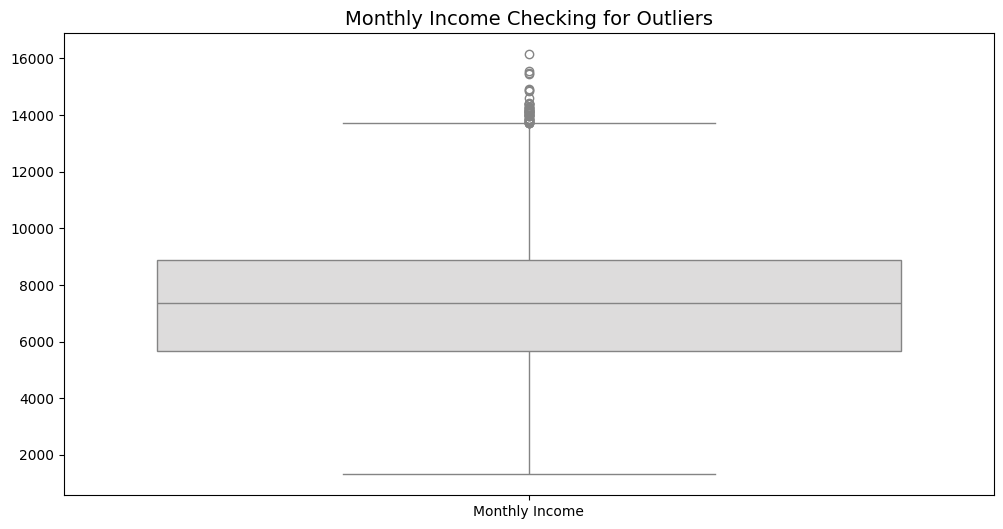

In [12]:
# Boxplot to detect outliers in numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Monthly Income"]], palette="coolwarm")
plt.title("Monthly Income Checking for Outliers", fontsize=14)
plt.show()

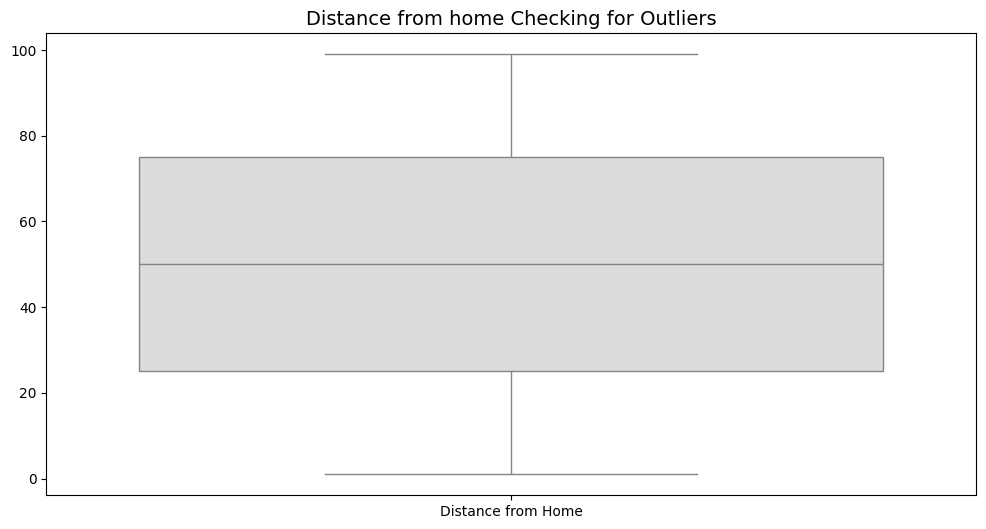

In [13]:
# Boxplot to detect outliers in numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Distance from Home"]], palette="coolwarm")
plt.title("Distance from home Checking for Outliers", fontsize=14)
plt.show()

In [14]:
# Compute Q1 (25%) and Q3 (75%)
Q1 = df["Monthly Income"].quantile(0.25)
Q3 = df["Monthly Income"].quantile(0.75)

# Compute IQR (Interquartile Range)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df["Monthly Income"] < lower_bound) | (df["Monthly Income"] > upper_bound)]
print(f"Number of outliers in Monthly Income: {len(outliers)}")

Number of outliers in Monthly Income: 50


#### Apply capping (Winsorization)

In [15]:
df["Monthly Income"] = np.where(df["Monthly Income"] > upper_bound, upper_bound, df["Monthly Income"])
df["Monthly Income"] = np.where(df["Monthly Income"] < lower_bound, lower_bound, df["Monthly Income"])


#### After Handling The Outliers

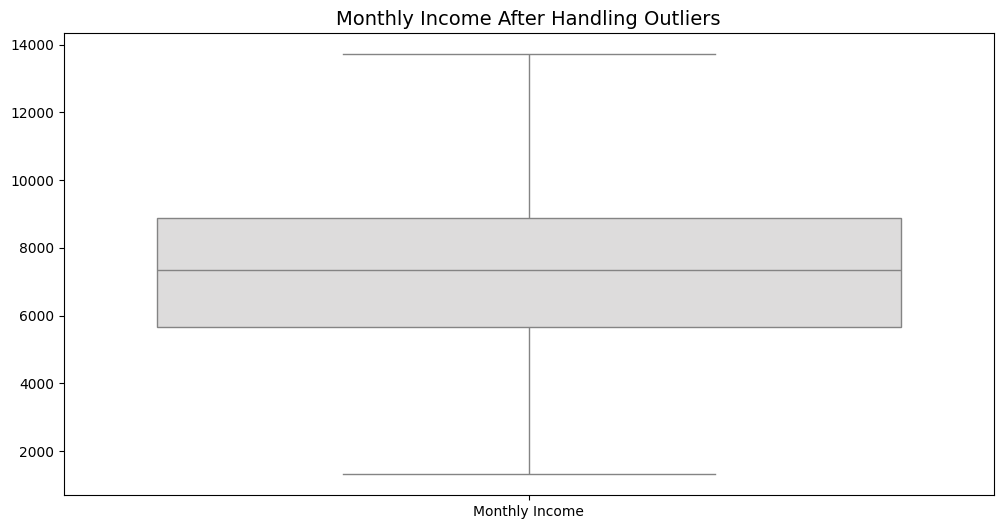

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Monthly Income"]], palette="coolwarm")
plt.title("Monthly Income After Handling Outliers", fontsize=14)
plt.show()

## **Exploratory Data Analysis(EDA)**

## **Univariate Analysis**

#### Attrition Distribution

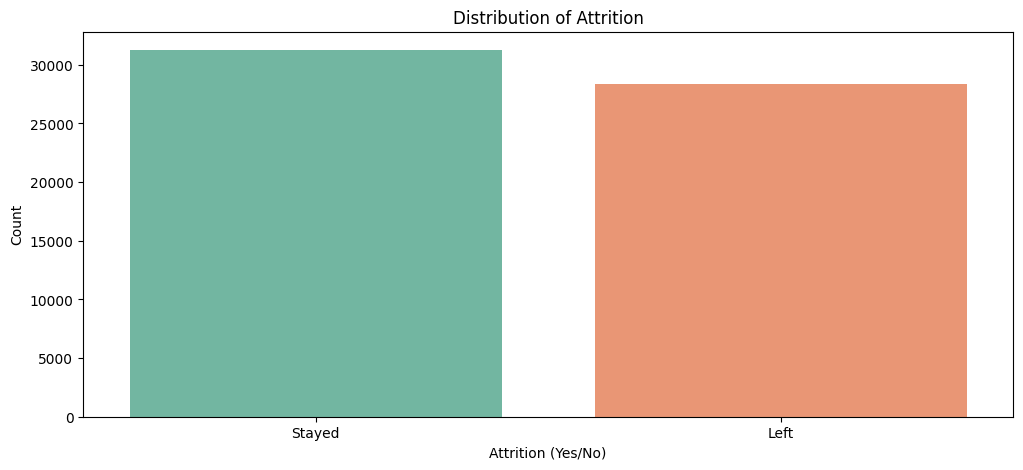

In [21]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Attrition', data=df, palette='Set2')  # Creates a bar chart for the 'Attrition' column with colorful bars.
plt.title('Distribution of Attrition')
plt.xlabel('Attrition (Yes/No)')
plt.ylabel('Count')
plt.show()


### Age Distribution

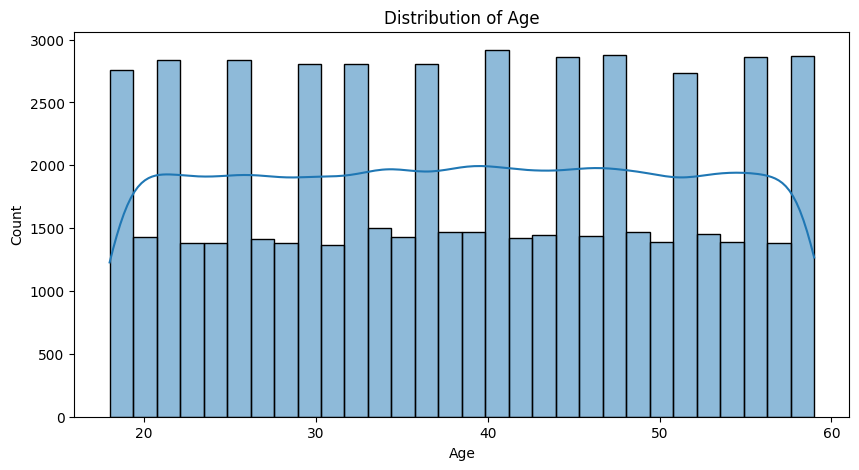

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Job Role Countplot

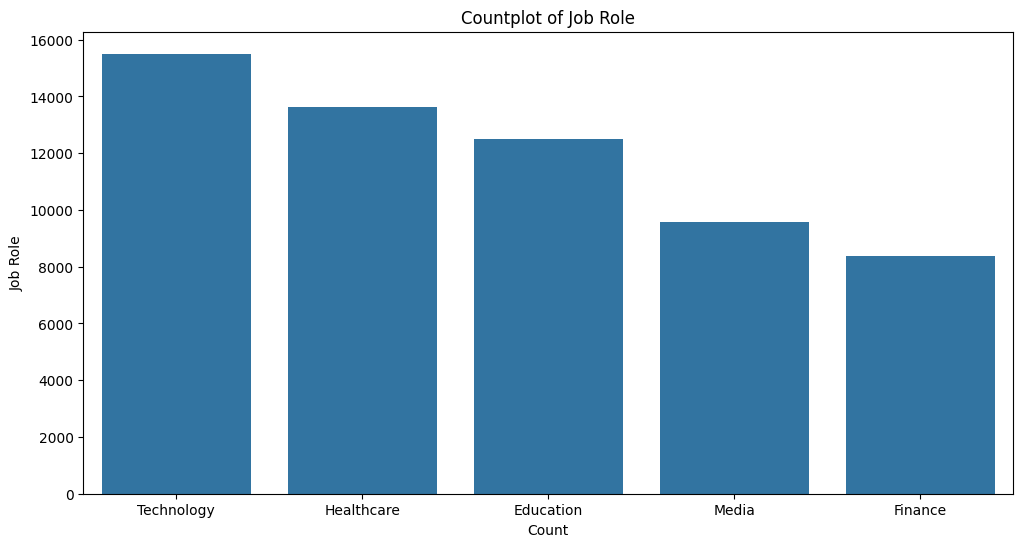

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Job Role'], order=df['Job Role'].value_counts().index)
plt.title("Countplot of Job Role")
plt.xlabel("Count")
plt.ylabel("Job Role")
plt.show()

### Work-Life Balance Pie Chart

In [24]:
pie_fig = px.pie(df, names='Work-Life Balance', title='Proportion of Work-Life Balance Ratings')
pie_fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Years at Company Histogram

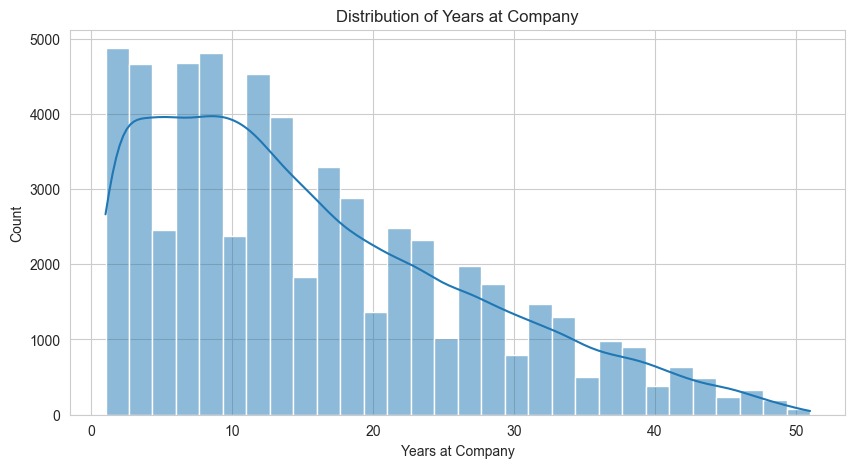

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Years at Company'], bins=30, kde=True)
plt.title("Distribution of Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Count")
plt.show()

### Performance Rating Countplot

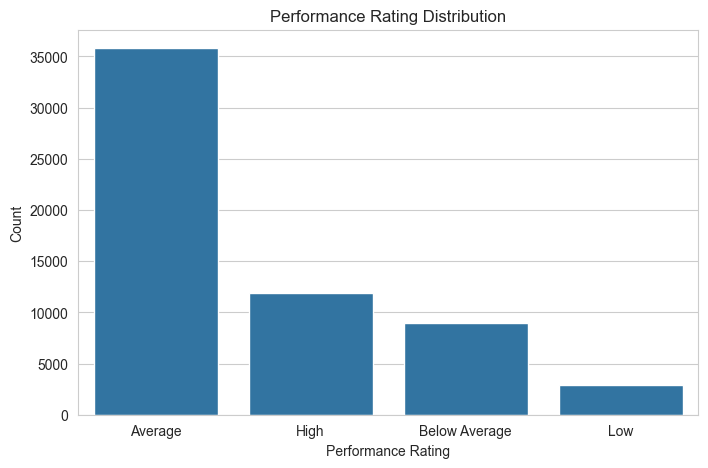

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Performance Rating'], order=df['Performance Rating'].value_counts().index)
plt.title("Performance Rating Distribution")
plt.xlabel("Performance Rating")
plt.ylabel("Count")
plt.show()

### Distance from Home Distribution

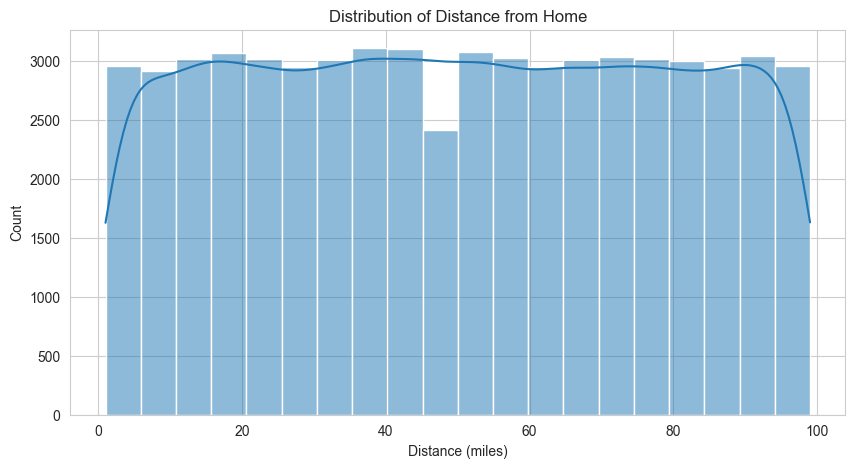

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Distance from Home'], bins=20, kde=True)
plt.title("Distribution of Distance from Home")
plt.xlabel("Distance (miles)")
plt.ylabel("Count")
plt.show()

### Marital Status Distribution

In [ ]:
pie_fig = px.pie(df, names='Marital Status', title='Marital Status Distribution')
pie_fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# Set plot style
sns.set_style("whitegrid")

## **Bivariate Analysis**

### Age vs Monthly Income

In [ ]:
fig = px.box(df, x='Age',
             y='Monthly Income',
             title='Age vs Monthly Income',
             labels={'Age': 'Age', 'Monthly Income': 'Monthly Income'})
fig.show()

### Attrition vs Monthly Income

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Attrition'], y=df['Monthly Income'])
plt.title("Attrition vs Monthly Income")
plt.xlabel("Attrition Status")
plt.ylabel("Monthly Income")
plt.show()

### Work-Life Balance vs Job Satisfaction

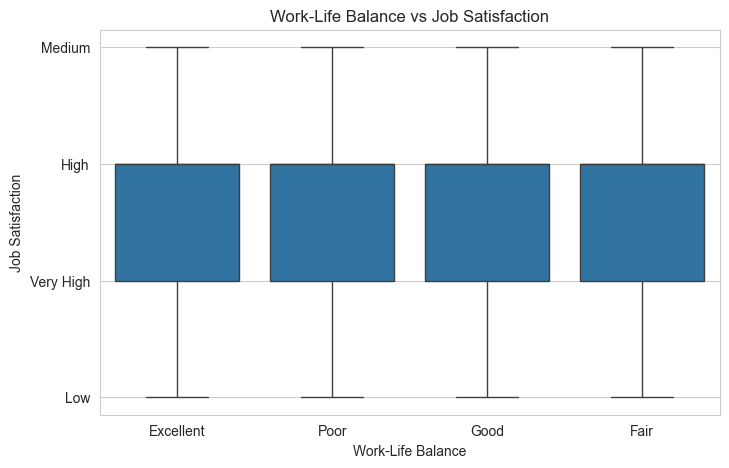

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Work-Life Balance'], y=df['Job Satisfaction'])
plt.title("Work-Life Balance vs Job Satisfaction")
plt.xlabel("Work-Life Balance")
plt.ylabel("Job Satisfaction")
plt.show()

### Years at Company vs Monthly Income

In [ ]:
fig = px.line(df.groupby("Years at Company")["Monthly Income"].mean().reset_index(),
              x="Years at Company",
              y="Monthly Income",
              title="Years at Company vs Monthly Income")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Performance Rating vs Attrition

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Performance Rating'], hue=df['Attrition'])
plt.title("Performance Rating vs Attrition")
plt.xlabel("Performance Rating")
plt.ylabel("Count")
plt.show()

#### Job Role Distribution

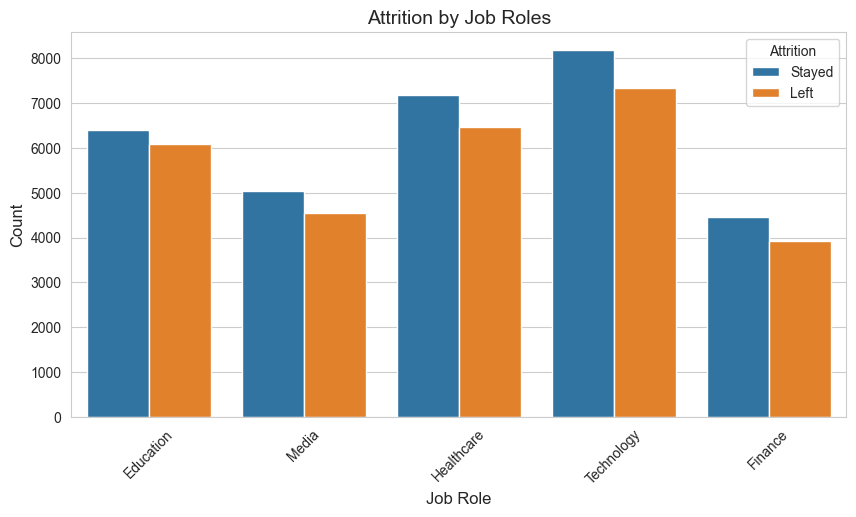

In [ ]:
# Set figure size
plt.figure(figsize=(10, 5))
# Create a grouped bar plot
sns.countplot(x="Job Role", hue="Attrition", data=df)

# Titles and labels
plt.title("Attrition by Job Roles", fontsize=14)
plt.xlabel("Job Role", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title="Attrition", labels=["Stayed", "Left"])  # Custom legend

# Show plot
plt.show()

#### Job Satisfaction

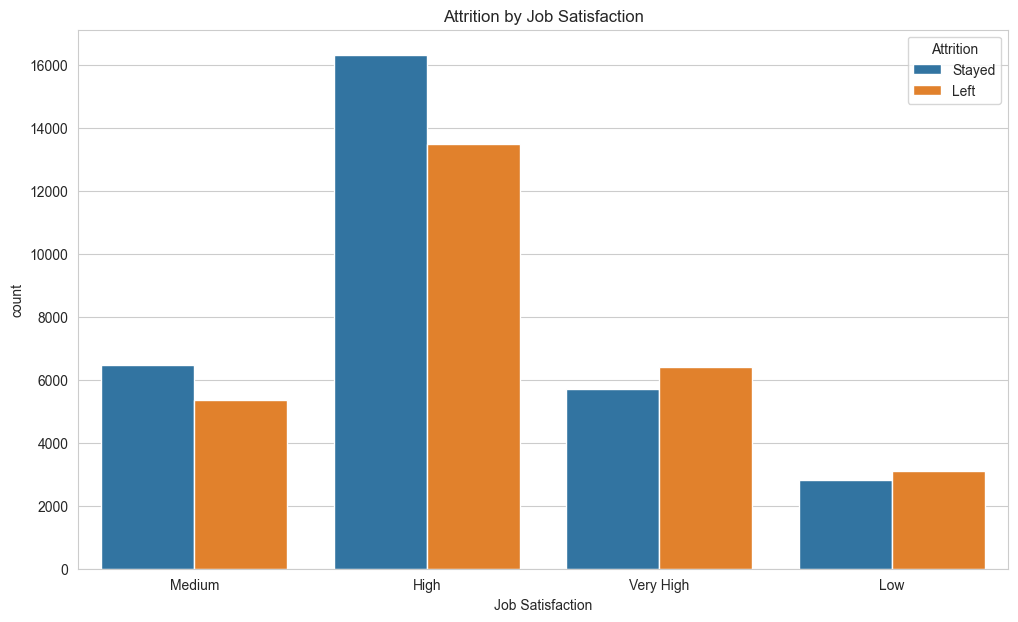

In [ ]:
# Plot Attrition by Job Satisfaction
plt.figure(figsize=(12, 7))
sns.countplot(x='Job Satisfaction', hue='Attrition', data=df)
plt.title('Attrition by Job Satisfaction')
plt.show()

#### Work-Life Balance

In [ ]:
# Plot Attrition by Work-Life Balance
plt.figure(figsize=(8, 6))
sns.countplot(x='Work-Life Balance', hue='Attrition', data=df)
plt.title('Attrition by Work-Life Balance')
plt.show()

#### Marital Status

In [ ]:
# Plot Attrition by Marital Status
plt.figure(figsize=(8, 10))
sns.countplot(x='Marital Status', hue='Attrition', data=df)
plt.title('Attrition by Marital Status')
plt.show()


#### Monthly Income vs Attrition

In [ ]:
# Aggregating data
attrition_counts = df.groupby(['Job Role', 'Overtime'])['Attrition'].value_counts().unstack()

# Plotting
attrition_counts.plot(kind='bar', stacked=True, figsize=(12, 10), colormap="viridis")
plt.title("Attrition by Job Role and Overtime Status")
plt.xlabel("Job Role & Overtime Status")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.show()

#### Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Label Encoding for ordinal categories
ordinal_features = ['Education Level', 'Job Level', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating']

# Apply Label Encoding
label_encoders = {}
for col in ordinal_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future decoding

# One-Hot Encoding for nominal categories
df = pd.get_dummies(df, columns=[col for col in cat_cols if col not in ordinal_features], drop_first=True)

# Display the first few rows after encoding
df.head()

,Age,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Distance from Home,Education Level,Number of Dependents,...,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High,Attrition_Stayed
0,31,19,5390.0,0,2,0,2,22,0,0,...,False,False,False,False,False,False,False,True,False,True
1,59,4,5534.0,3,0,3,3,21,3,3,...,False,False,False,True,False,False,True,False,False,True
2,24,10,8159.0,2,0,3,0,11,1,3,...,False,False,False,False,False,True,True,False,False,True
3,36,7,3989.0,2,0,2,1,27,2,2,...,True,False,False,False,True,False,False,True,False,True
4,56,41,4821.0,1,3,0,0,71,2,0,...,False,False,False,True,False,False,False,True,False,True


####  Creating relevant interaction features

In [ ]:
# 1️⃣ Salary-to-Performance Ratio
df["Salary_Performance_Ratio"] = df["Monthly Income"] / (df["Performance Rating"] + 1)  # Avoid division by zero

# 2️⃣ Categorizing Tenure into Groups
def tenure_category(years):
    if years < 2:
        return "Short-Term"
    elif 2 <= years < 5:
        return "Medium-Term"
    else:
        return "Long-Term"

df["Tenure_Group"] = df["Years at Company"].apply(tenure_category)

# Encode Tenure Groups
tenure_mapping = {"Short-Term": 1, "Medium-Term": 2, "Long-Term": 3}
df["Tenure_Group"] = df["Tenure_Group"].map(tenure_mapping)
# 3️⃣ Interaction Feature: Work-Life Balance & Job Satisfaction
df["WorkLife_Satisfaction_Score"] = df["Work-Life Balance"] * df["Job Satisfaction"]

# 4️⃣ Normalized Income Based on Job Level
df["Income_JobLevel_Ratio"] = df["Monthly Income"] / (df["Job Level"] + 1)  # Avoid division by zero

# Display first few rows
df.head()

#### Normalizing Numerical Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select only numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Display the first few rows after normalization
df.head()


,Age,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Distance from Home,Education Level,Number of Dependents,...,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High,Attrition_Stayed
0,0.317073,0.36,0.328628,0.000000,0.666667,0.000000,0.50,0.214286,0.00,0.000000,...,False,False,False,False,False,False,False,True,False,True
1,1.000000,0.06,0.340244,1.000000,0.000000,1.000000,0.75,0.204082,0.75,0.500000,...,False,False,False,True,False,False,True,False,False,True
2,0.146341,0.18,0.551988,0.666667,0.000000,1.000000,0.00,0.102041,0.25,0.500000,...,False,False,False,False,False,True,True,False,False,True
3,0.439024,0.12,0.215617,0.666667,0.000000,0.666667,0.25,0.265306,0.50,0.333333,...,True,False,False,False,True,False,False,True,False,True
4,0.926829,0.80,0.282730,0.333333,1.000000,0.000000,0.00,0.714286,0.50,0.000000,...,False,False,False,True,False,False,False,True,False,True


In [ ]:
df.columns

In [ ]:
df.drop(columns=['Gender_Male', 'Overtime_Yes', 'Company Size_Medium', 'Company Size_Small',
                 'Leadership Opportunities_Yes', 'Innovation Opportunities_Yes',
                 'Company Reputation_Fair', 'Company Reputation_Good', 'Company Reputation_Poor',
                 'Employee Recognition_Low', 'Employee Recognition_Medium', 'Employee Recognition_Very High'], inplace=True)


In [ ]:
df.head()

,Age,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Distance from Home,Education Level,Number of Dependents,Job Level,Company Tenure,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Marital Status_Married,Marital Status_Single,Remote Work_Yes,Attrition_Stayed
0,0.317073,0.36,0.328628,0.000000,0.666667,0.000000,0.50,0.214286,0.00,0.000000,0.5,0.690476,False,False,False,False,True,False,False,True
1,1.000000,0.06,0.340244,1.000000,0.000000,1.000000,0.75,0.204082,0.75,0.500000,0.5,0.150794,False,False,True,False,False,False,False,True
2,0.146341,0.18,0.551988,0.666667,0.000000,1.000000,0.00,0.102041,0.25,0.500000,0.5,0.571429,False,True,False,False,True,False,False,True
3,0.439024,0.12,0.215617,0.666667,0.000000,0.666667,0.25,0.265306,0.50,0.333333,0.5,0.380952,False,False,False,False,False,True,True,True
4,0.926829,0.80,0.282730,0.333333,1.000000,0.000000,0.00,0.714286,0.50,0.000000,1.0,0.523810,False,False,False,False,False,False,False,True


### **Multivariate Analysis**

#### Correlation Analysis

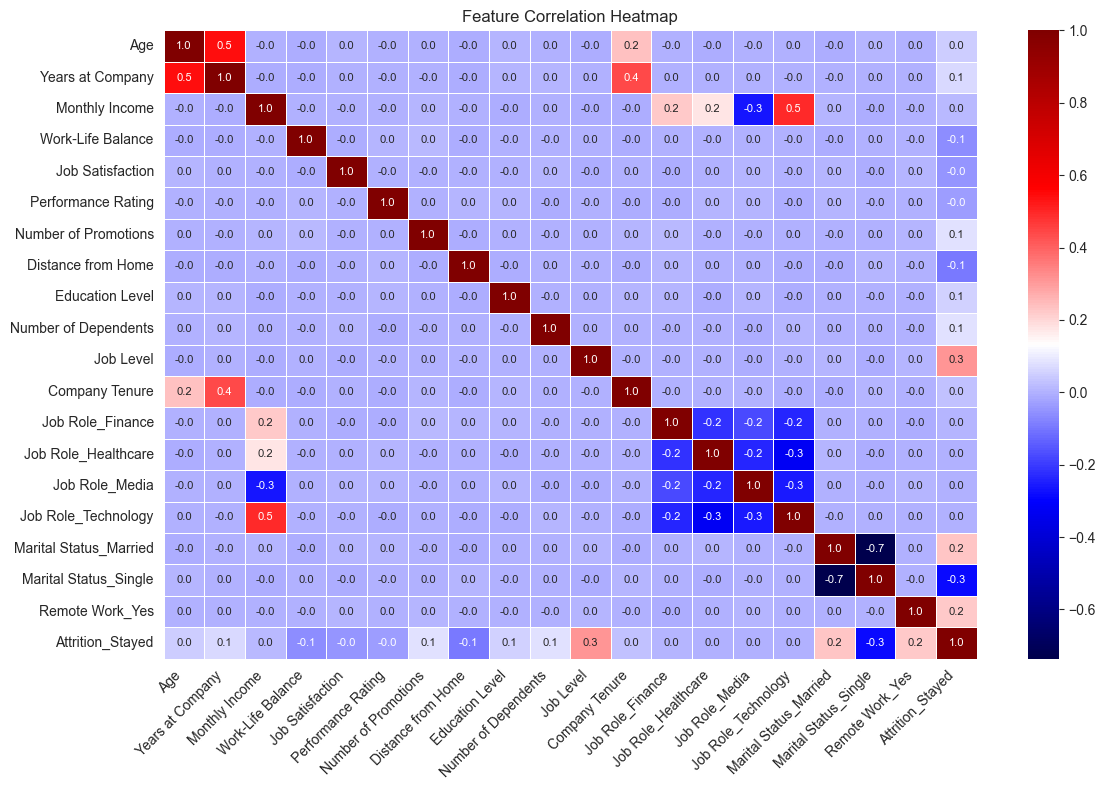


### Key Observations from Correlation Heatmap:

- **Years at Company vs Monthly Income**: Strong positive correlation, indicating that employees who stay longer tend to earn more.
- **Job Level vs Monthly Income**: High correlation, meaning that as job level increases, salary also increases.
- **Age vs Years at Company**: Expected positive correlation since older employees usually have more tenure.
- **Attrition vs Monthly Income**: If there is a negative correlation, it may suggest that lower salaries contribute to higher attrition.
- **Distance from Home vs Attrition**: If positively correlated, it might indicate that employees who live farther are more likely to leave.

These insights can help HR teams make data-driven decisions on retention and salary structures.


In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap with better readability
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap="seismic", linewidths=0.6, annot_kws={"size": 8})

# Improve label readability
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.title("Feature Correlation Heatmap", fontsize=12)

# Show the heatmap
plt.tight_layout()
plt.show()
# 📌 Add Key Observations
print("\n### Key Observations from Correlation Heatmap:\n")
print("- **Years at Company vs Monthly Income**: Strong positive correlation, indicating that employees who stay longer tend to earn more.")
print("- **Job Level vs Monthly Income**: High correlation, meaning that as job level increases, salary also increases.")
print("- **Age vs Years at Company**: Expected positive correlation since older employees usually have more tenure.")
print("- **Attrition vs Monthly Income**: If there is a negative correlation, it may suggest that lower salaries contribute to higher attrition.")
print("- **Distance from Home vs Attrition**: If positively correlated, it might indicate that employees who live farther are more likely to leave.")
print("\nThese insights can help HR teams make data-driven decisions on retention and salary structures.")

### **Advanced Data Analysis**

In [ ]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

## Step 1: Perform Statistical Tests

### **Define Featuers X and Target y**

In [ ]:
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target

### T-Test (Numerical Features)

In [ ]:
t_test_results = {feature: ttest_ind(df[df["Attrition"] == 0][feature],
                                     df[df["Attrition"] == 1][feature],
                                     equal_var=False)[1]
                  for feature in categorical_cols}

In [ ]:
print("\n🔍 T-Test Results (P-values):")
print(t_test_results)

### ANOVA (Numerical Features)

In [ ]:
anova_results = {feature: f_oneway(df[df["Attrition"] == 0][feature],
                                   df[df["Attrition"] == 1][feature])[1]
                 for feature in categorical_cols}

In [ ]:
print("\n📌 **ANOVA Results (P-values):**")
print(anova_results)

## Chi-Squared Test (Categorical Features)

In [ ]:
chi2_results = {}
for feature in numerical_cols:
    contingency_table = pd.crosstab(df[feature], df["Attrition"])
    chi2_results[feature] = chi2_contingency(contingency_table)[1]

In [ ]:
print("\n📊 **Chi-Squared Test Results (P-values):**")
print(chi2_results)

## Step 2: Feature Selection using SelectKBest

In [ ]:
select_kbest = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_selected = select_kbest.fit_transform(X, y)
selected_features = X.columns[select_kbest.get_support()]

In [ ]:
print("\n🚀 Top 5 Selected Features (SelectKBest - ANOVA F-test):")
print(list(selected_features))

## Step 3: Visualize Feature Importance

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(y=selected_features, x=select_kbest.scores_[select_kbest.get_support()], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 5 Features Influencing Employee Attrition")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

#### Kernel Density Estimation (KDE): Monthly Income Distribution

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["Attrition"] == 0]["Monthly Income"], label="Stayed", shade=True, color="blue")
sns.kdeplot(df[df["Attrition"] == 1]["Monthly Income"], label="Left", shade=True, color="red")

plt.title("KDE Plot: Monthly Income Distribution by Attrition")
plt.xlabel("Monthly Income")
plt.ylabel("Density")
plt.legend()
plt.show()

#### Pair Plot: Relationships Between Key Features

In [ ]:
key_features = ["Monthly Income", "Years at Company", "Work-Life Balance", "Job Satisfaction", "Attrition"]
sns.pairplot(df[key_features], hue="Attrition", palette="coolwarm", diag_kind="kde")

plt.suptitle("Pair Plot of Key Features Affecting Attrition", fontsize=16)
plt.show()

## Employee Patterns Across Multiple Attributes

In [ ]:
import plotly.express as px

# Select key features
cols = ['Age', 'Monthly Income', 'Years at Company', 'Job Satisfaction', 'Performance Rating', 'Attrition']

# Convert categorical target to numerical for visualization
df['Attrition_Num'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create parallel coordinates plot
fig = px.parallel_coordinates(df, dimensions=cols, color='Attrition_Num',
                              color_continuous_scale=px.colors.sequential.Viridis)
fig.show()


### Hierarchical Attrition Analysis

In [ ]:
fig = px.sunburst(df, path=['Job Role', 'Attrition'], values='Years at Company',
                  color='Attrition', color_discrete_map={'Yes': 'red', 'No': 'green'},
                  title="Attrition Breakdown by Job Role")
fig.show()


### Pairplot of Age, Years at Company, Monthly Income, and Job Level

In [ ]:
# Selecting relevant numerical features
num_features = ['Age', 'Years at Company', 'Monthly Income', 'Job Level']

# Creating pairplot with hue based on Attrition
sns.pairplot(df[num_features + ['Attrition']], hue="Attrition", palette="husl", diag_kind="kde")
plt.suptitle("Pairplot of Age, Years at Company, Monthly Income, and Job Level", y=1.02)
plt.show()

### Attrition Trend Over Time

In [ ]:
fig = px.scatter(df, x='Age', y='Monthly Income', animation_frame='Years at Company',
                 color='Attrition', size='Performance Rating',
                 title="Attrition Trend Over Time")
fig.show()


In [ ]:
# Define the file path for the final cleaned and edited dataset
final_dataset_path = "Final_Cleaned_Dataset.csv"

# Save the dataset to a new CSV file without the index column
df.to_csv(final_dataset_path, index=False)

print(f"Dataset successfully saved as {final_dataset_path}")

## **Model Development and Optimization**

#### **Define Featuers X and Target y**

In [ ]:
# Load the cleaned dataset
df = pd.read_csv('Final_Cleaned_Dataset.csv')

X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target

#### **Model Training**

##### **Data Spliting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### **Model Evaluation**

In [ ]:
# Function to train and evaluate models
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test, cv=5):

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    print(f'Performance of {model_name} ({cv}-Fold Cross Validation):')
    print(f'ROC-AUC Scores: {cv_scores}')
    print(f'Average ROC-AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}\n')

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)

    print(f'Performance of {model_name}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    print(f'ROC-AUC: {roc_auc:.4f}')
    print(f'Confusion Matrix:\n{cm}\n')

    # Plot ROC curve
    plot_roc_curve(y_test, y_pred_proba, model_name)

    # Plot confusion matrix
    plot_confusion_matrix(cm, model_name)


    # Store results in a DataFrame (for tables)
    results_df = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1],
        'ROC-AUC': [roc_auc]
    })

    return results_df  # Return only the DataFrame

In [ ]:
# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_pred_proba):.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [ ]:
# Train Models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
}


In [ ]:
metrics_before_tuning = pd.DataFrame()

for name, model in models.items():
    results = evaluate_model(model, name, X_train_resampled, y_train_resampled, X_test, y_test)
    metrics_before_tuning = pd.concat([metrics_before_tuning, results], ignore_index=True)


### **Hyperparameter Tuning**

In [ ]:
# Define parameter grids
param_grids = {
    "Logistic Regression": {
        "C": [0.001, 0.01, 0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [5, 10, 15],
        "min_samples_split": [2, 5, 10]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "XGBoost": {
        "n_estimators": [100, 300, 500],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    }
}

In [ ]:
def tune_model(model, param_grid, X_train, y_train, scoring="recall"):
    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=10,
        cv=5,
        scoring=scoring,
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    print(f"Best Params for {model.__class__.__name__}: {random_search.best_params_}\n")
    return random_search.best_estimator_

In [ ]:
metrics_after_tuning = pd.DataFrame()

for name, model in models.items():
    print(f"Tuning {name}...")
    best_model = tune_model(model, param_grids[name], X_train_resampled, y_train_resampled)

    # Evaluate using your existing function
    results = evaluate_model(best_model, f"Tuned {name}", X_train_resampled, y_train_resampled, X_test, y_test)

    # Store tuned results
    metrics_after_tuning = pd.concat([metrics_after_tuning, results], ignore_index=True)


### **Model Comparison**

In [ ]:
print("\nModel Performance Before Tuning:")
display(metrics_before_tuning)

print("\nModel Performance After Tuning:")
display(metrics_after_tuning)

In [ ]:
joblib.dump(best_model, 'final_model.pkl')